In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
annotation_file_path = "/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/data/processed data/svi with hepvu/2018/annotation 2018/annotation_NOD.csv"

In [3]:
data = pd.read_csv(annotation_file_path,dtype={'STCNTY': str} )

In [4]:
data.head()

,STCNTY,percentile,NOD
0,01001,2,0.161264
1,01003,3,0.193679
2,01005,0,0.115073
3,01007,4,0.260130
4,01009,4,0.234198


array([[<Axes: title={'center': 'NOD'}>]], dtype=object)

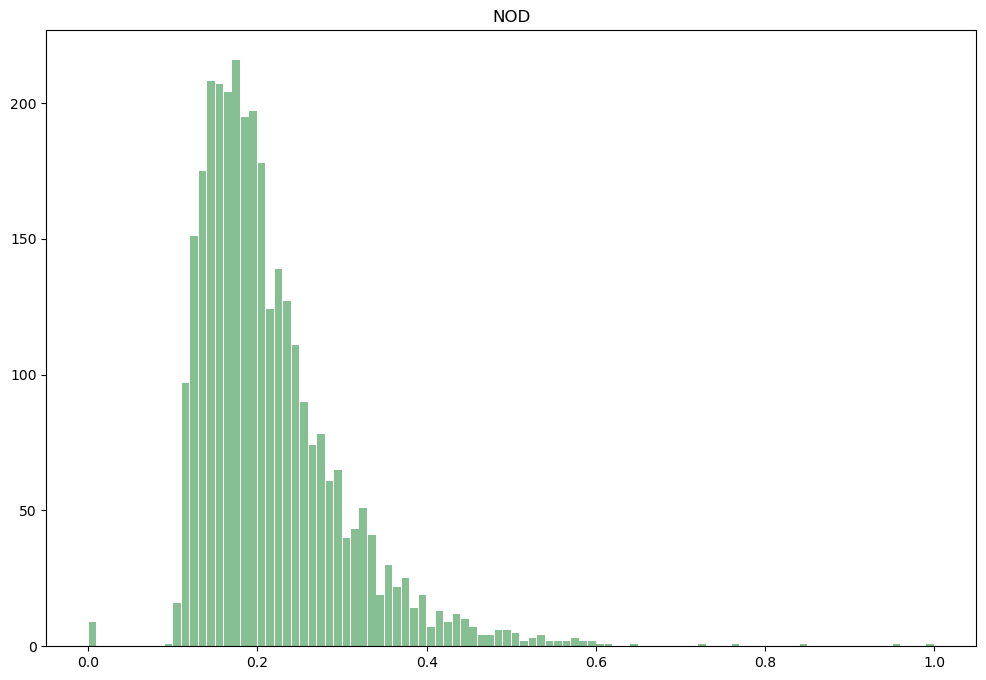

In [5]:
#plot a histogram of the data
data.hist(column='NOD', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [28]:
# log transform the data without negative and plot the histogram
data['NODLOG'] = np.log(data['NOD'])


/Users/h6x/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
# drop - inf values
data = data[data['NODLOG'] != -np.inf]

In [32]:
data

,STCNTY,percentile,NOD,NODLOG
0,01001,2,0.161264,-1.824711
1,01003,3,0.193679,-1.641553
2,01005,0,0.115073,-2.162189
3,01007,4,0.260130,-1.346575
4,01009,4,0.234198,-1.451590
...,...,...,...,...
3135,56037,4,0.226094,-1.486804
3136,56039,0,0.147488,-1.914010
3137,56041,4,0.233387,-1.455056
3138,56043,4,0.230956,-1.465527


array([[<Axes: title={'center': 'NODLOG'}>]], dtype=object)

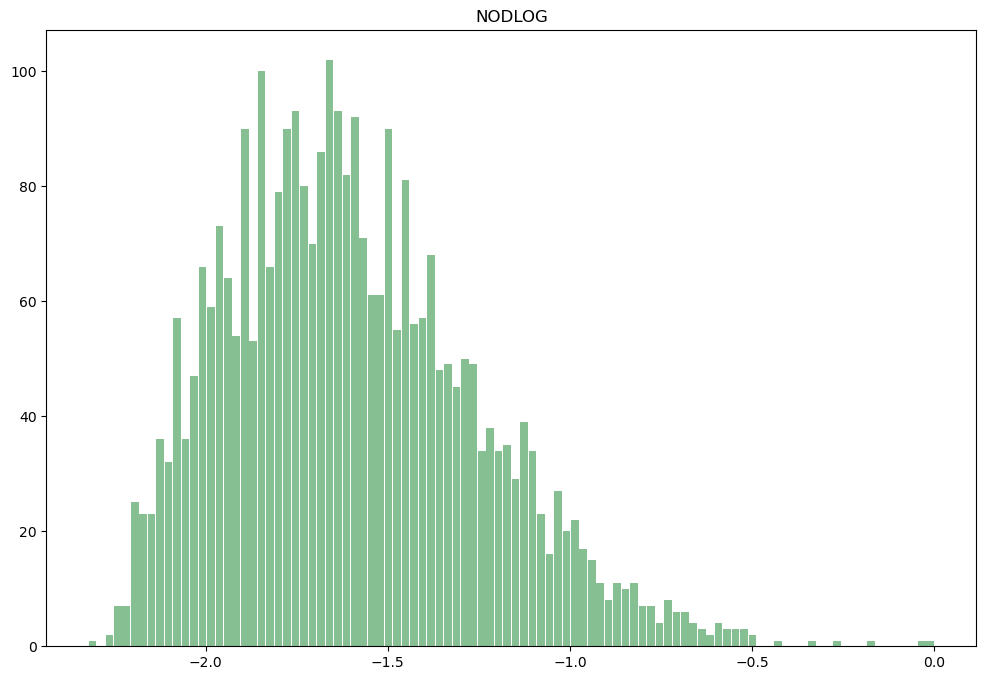

In [33]:
data.hist(column='NODLOG', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [10]:
df = data.__deepcopy__()

In [11]:
# Sample data creation
np.random.seed(0)

# Step 1: Create bins using pd.cut
df['bins'] = pd.cut(df['NOD'], bins=100)

# Step 2: Group by the bins
grouped = df.groupby('bins')

# Step 3: Sample 10 data points or less from each bin
sampled_df_list = [group.sample(n=min(len(group), 10), random_state=1) for name, group in grouped]

# Step 4: Concatenate the sampled data points into a new DataFrame
sampled_df = pd.concat(sampled_df_list).reset_index(drop=True)

# Display the result
print(sampled_df)

    STCNTY  percentile       NOD            bins
0    08123           0  0.000000  (-0.001, 0.01]
1    02198           1  0.000000  (-0.001, 0.01]
2    08014           0  0.000000  (-0.001, 0.01]
3    08059           0  0.000000  (-0.001, 0.01]
4    02195           0  0.000000  (-0.001, 0.01]
..     ...         ...       ...             ...
413  35039           4  0.721232    (0.72, 0.73]
414  54047           4  0.762561    (0.76, 0.77]
415  54005           4  0.840357    (0.84, 0.85]
416  24510           4  0.954619    (0.95, 0.96]
417  54011           4  1.000000     (0.99, 1.0]

[418 rows x 4 columns]


In [15]:
# filter the data where NOD between 0.1-0.5
data_filtered = sampled_df[(sampled_df['NOD'] > 0.1) & (sampled_df['NOD'] < 0.5)]
data_filtered

,STCNTY,percentile,NOD,bins
10,19141,0,0.103728,"(0.1, 0.11]"
11,46079,0,0.105348,"(0.1, 0.11]"
12,31081,0,0.109400,"(0.1, 0.11]"
13,19109,0,0.108590,"(0.1, 0.11]"
14,31003,0,0.106969,"(0.1, 0.11]"
...,...,...,...,...
378,21187,4,0.491086,"(0.49, 0.5]"
379,21049,4,0.493517,"(0.49, 0.5]"
381,24043,4,0.491896,"(0.49, 0.5]"
382,24005,4,0.499190,"(0.49, 0.5]"


array([[<Axes: title={'center': 'NOD'}>]], dtype=object)

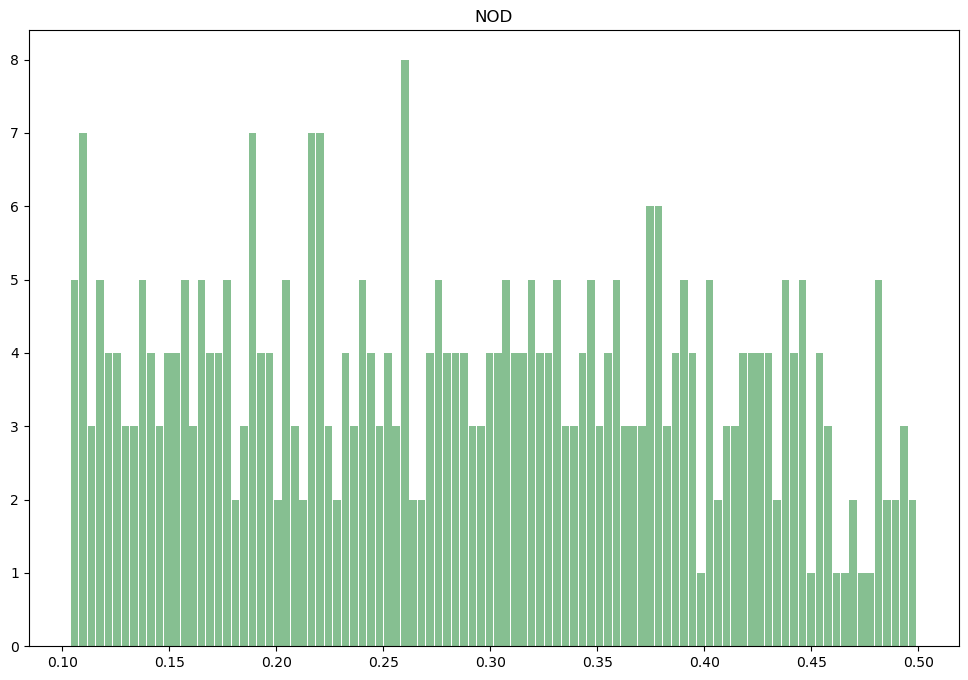

In [17]:
# plot the sampled data
data_filtered.hist(column='NOD', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [18]:
# save as a csv file
sampled_df.to_csv('/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/data/processed data/svi with hepvu/2018/annotation 2018/annotation_NOD_sample_10_low_range.csv', index=False)